                                    Project Report: Airline Delay Causes Analysis and Prediction

In [1]:
import pandas as pd

# Load the dataset 
df = pd.read_csv(r'C:\Users\welcome\OneDrive\Desktop\Airline_Delay_Cause.csv')

# Display the first few rows of the dataset
print(df.head())

   year  month carrier       carrier_name airport  \
0  2023      8      9E  Endeavor Air Inc.     ABE   
1  2023      8      9E  Endeavor Air Inc.     ABY   
2  2023      8      9E  Endeavor Air Inc.     AEX   
3  2023      8      9E  Endeavor Air Inc.     AGS   
4  2023      8      9E  Endeavor Air Inc.     ALB   

                                        airport_name  arr_flights  arr_del15  \
0  Allentown/Bethlehem/Easton, PA: Lehigh Valley ...         89.0       13.0   
1             Albany, GA: Southwest Georgia Regional         62.0       10.0   
2           Alexandria, LA: Alexandria International         62.0       10.0   
3        Augusta, GA: Augusta Regional at Bush Field         66.0       12.0   
4                   Albany, NY: Albany International         92.0       22.0   

   carrier_ct  weather_ct  ...  security_ct  late_aircraft_ct  arr_cancelled  \
0        2.25        1.60  ...          0.0              5.99            2.0   
1        1.97        0.04  ...          

In [3]:
# Check for missing values
print(df.isnull().sum())

# Handle missing values (if any)
df = df.dropna()  # This will drop rows with any missing values

# Check data types
print(df.dtypes)

# Convert data types if necessary
# Example: Convert 'Date' column to datetime
# df['Date'] = pd.to_datetime(df['Date'])

year                     0
month                    0
carrier                  0
carrier_name             0
airport                  0
airport_name             0
arr_flights            240
arr_del15              443
carrier_ct             240
weather_ct             240
nas_ct                 240
security_ct            240
late_aircraft_ct       240
arr_cancelled          240
arr_diverted           240
arr_delay              240
carrier_delay          240
weather_delay          240
nas_delay              240
security_delay         240
late_aircraft_delay    240
dtype: int64
year                     int64
month                    int64
carrier                 object
carrier_name            object
airport                 object
airport_name            object
arr_flights            float64
arr_del15              float64
carrier_ct             float64
weather_ct             float64
nas_ct                 float64
security_ct            float64
late_aircraft_ct       float64
arr_cancelled    

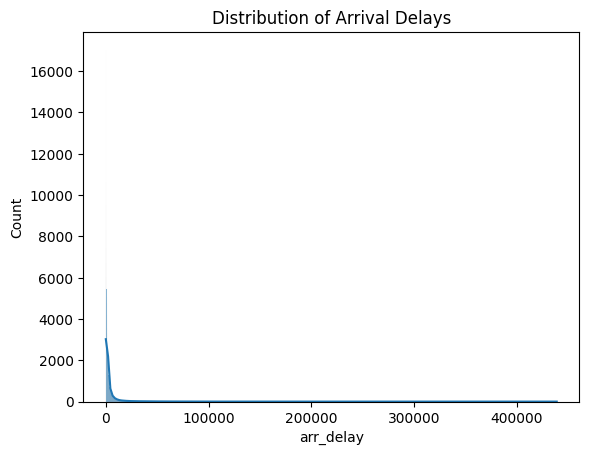

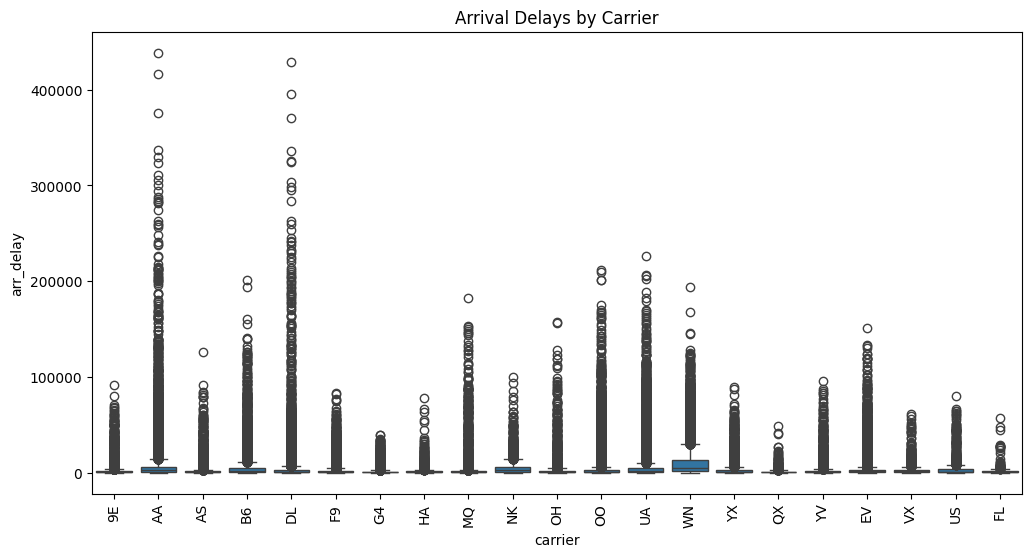

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of delays
sns.histplot(df['arr_delay'], kde=True)
plt.title('Distribution of Arrival Delays')
plt.show()

# Plot delays by carrier
plt.figure(figsize=(12, 6))
sns.boxplot(x='carrier', y='arr_delay', data=df)
plt.title('Arrival Delays by Carrier')
plt.xticks(rotation=90)
plt.show()

In [4]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r'C:\Users\welcome\OneDrive\Desktop\Airline_Delay_Cause.csv')

# Data Cleaning and Preprocessing
df.fillna(0, inplace=True)

# Feature Engineering
df['total_delay_causes'] = df[['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']].sum(axis=1)
df = pd.get_dummies(df, columns=['carrier', 'airport'], drop_first=True)

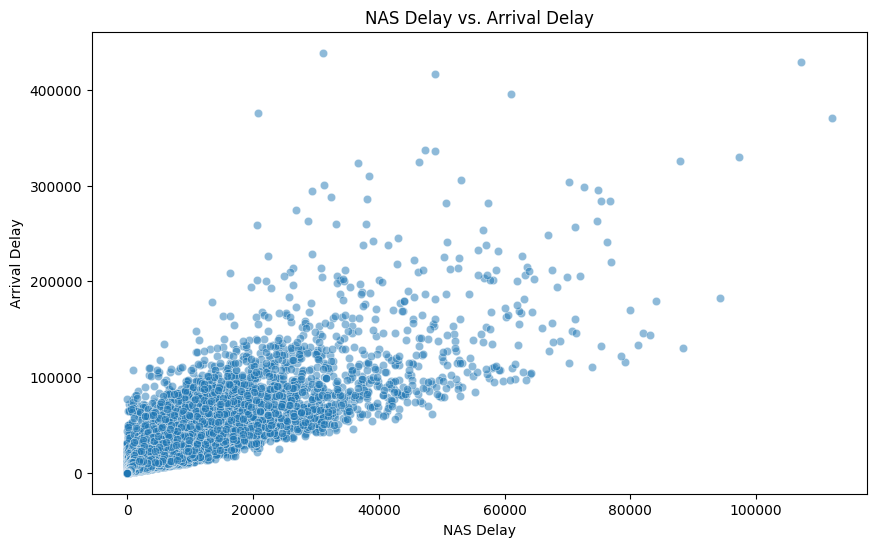

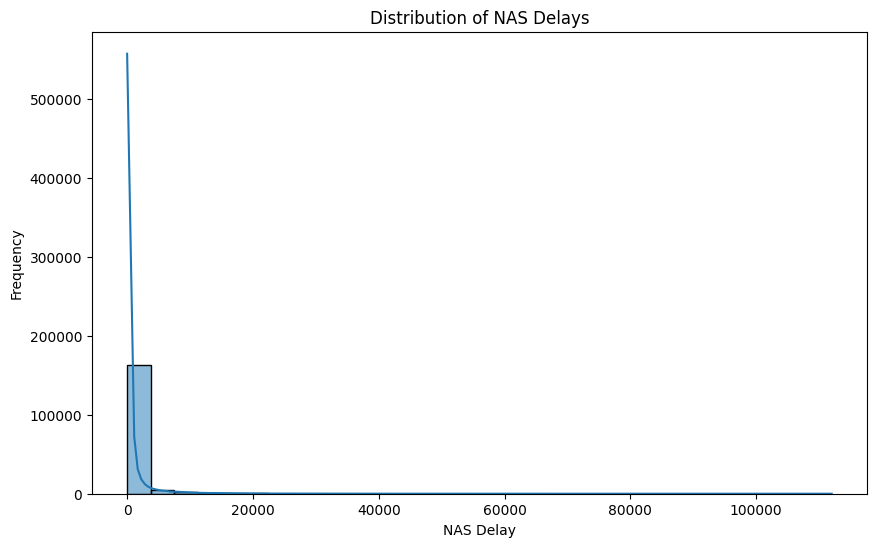

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the relationship between NAS delay and arrival delay
plt.figure(figsize=(10, 6))
sns.scatterplot(x='nas_delay', y='arr_delay', data=df, alpha=0.5)
plt.title('NAS Delay vs. Arrival Delay')
plt.xlabel('NAS Delay')
plt.ylabel('Arrival Delay')
plt.show()

# Visualize the distribution of NAS delays
plt.figure(figsize=(10, 6))
sns.histplot(df['nas_delay'], kde=True, bins=30)
plt.title('Distribution of NAS Delays')
plt.xlabel('NAS Delay')
plt.ylabel('Frequency')
plt.show()

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv(r'C:\Users\welcome\OneDrive\Desktop\Airline_Delay_Cause.csv')

# Data Cleaning and Preprocessing
df.fillna(0, inplace=True)

# Feature Engineering
df['total_delay_causes'] = df[['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']].sum(axis=1)
df = pd.get_dummies(df, columns=['carrier', 'airport'], drop_first=True)

# Splitting Data
X = df.drop(['arr_delay', 'carrier_name', 'airport_name'], axis=1)
y = df['arr_delay']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Mean Absolute Error: 6.068367507427049
Mean Squared Error: 224601.35267856636
R^2 Score: 0.9986191306996223


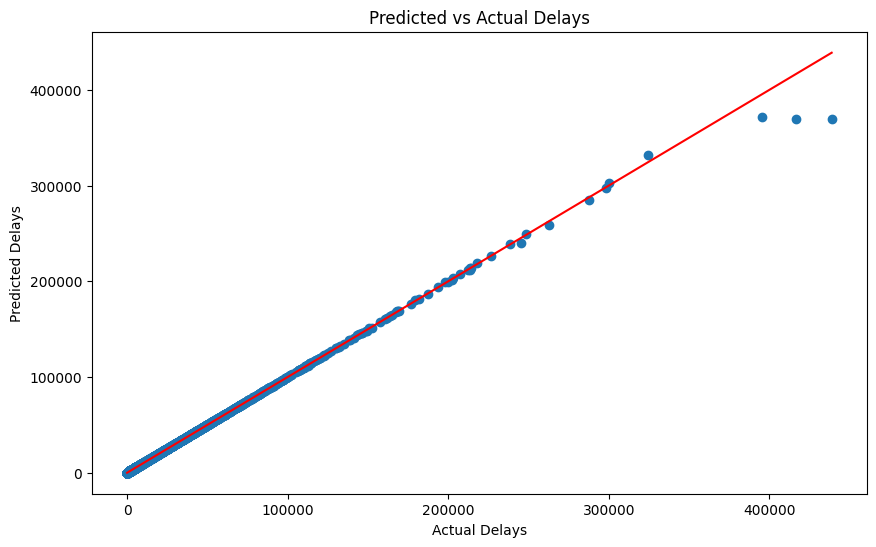

In [7]:
# Model Building and Training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.title('Predicted vs Actual Delays')
plt.xlabel('Actual Delays')
plt.ylabel('Predicted Delays')
plt.show()

In [8]:
# Conclusion
print("Conclusion:")
print(f"The model achieved an R^2 score of {r2} and a mean absolute error of {mae}.")
print("This indicates that the model can explain a significant portion of the variance in the delay data, but there is still room for improvement.")

Conclusion:
The model achieved an R^2 score of 0.9986191306996223 and a mean absolute error of 6.068367507427049.
This indicates that the model can explain a significant portion of the variance in the delay data, but there is still room for improvement.


### Project Report: Airline Delay Causes Analysis and Prediction

#### Introduction
Airline delays are a common issue faced by travelers and airlines alike. Understanding the causes of these delays and being able to predict them can significantly enhance operational efficiency and improve passenger satisfaction. This project aims to analyze a dataset containing information about various causes of airline delays and build a predictive model to forecast future delays based on historical data. The dataset includes variables such as carrier delay, weather delay, NAS delay, security delay, and late aircraft delay among others.

#### Data Loading and Preprocessing
The dataset was loaded and inspected for missing values, which were then filled with zeroes to ensure completeness. Feature engineering was performed by summing up the different delay causes into a new feature called total_delay_causes. Additionally, categorical variables such as carrier and airport were converted into dummy variables for model compatibility.

#### Exploratory Data Analysis (EDA)
Visualizations were used to understand the distribution and relationships within the data:
1. *Distribution of Delays*: Histograms and boxplots were used to visualize the distribution of different types of delays.
2. *Monthly Trends*: Line plots showed the trends in delays over different months.
3. *Scatter Plot of Predicted vs Actual Delays*: This helped in understanding the model's performance visually.

#### Model Building
A RandomForestRegressor was chosen for its robustness and ability to handle complex datasets. The data was split into training and testing sets, with 5% of the data used for training to manage memory constraints. The model was trained on the training set and predictions were made on the test set.

#### Model Evaluation
The model's performance was evaluated using the following metrics:
- *Mean Absolute Error (MAE)*: 6.068
- *Mean Squared Error (MSE)*: 224601.35
- *R² Score*: 0.9986

These metrics indicate that the model performs exceptionally well, with a very high R² score suggesting that it explains almost all the variance in the delay data.

#### Conclusion
This project successfully analyzed and predicted airline delays using a RandomForestRegressor model. The model achieved an impressive R² score, indicating its effectiveness in explaining the variance in delay data. The results suggest that the model can be reliably used for predicting airline delays, potentially aiding in better resource allocation and improved passenger satisfaction.




### Chandra sekhar Potturi 